In [1]:
from Utils import Misc, TrainTestValid, Pickle, Feature, Evaluation
from Utils.Models import Model, Accuracy
import tensorflow as tf
import numpy as np
import importlib
import os


In [7]:
feature_2D_path = os.path.join(Misc.get_dir('Data','Out','Pickle'),'features_2D.pkl')
label_path =  os.path.join(Misc.get_dir('Data','Out','Pickle'),'labels.pkl')

features_2D_mel = Pickle.load_pickle(feature_2D_path)['mel']
labels = Pickle.load_pickle(label_path)

Loading pickle file from Data\Out\Pickle\features_2D.pkl
Loading pickle file from Data\Out\Pickle\labels.pkl


In [5]:
model_path = Misc.get_dir('Data','Out','Model')
CNN_2D_mel = Evaluation.load_models(model_path)['CNN2D_mel']

loading model CNN2D_mel.h5...
loading model LSTM_cqt.h5...
loading model LSTM_M2M_cqt.h5...
loading model LSTM_M2M_mel.h5...
loading model LSTM_M2M_mfcc.h5...
loading model LSTM_mel.h5...
loading model LSTM_mfcc.h5...
loading model MLP_1H_cqt.h5...
loading model MLP_1H_mel.h5...
loading model MLP_1H_mfcc.h5...
loading model MLP_cqt.h5...
loading model MLP_mel.h5...
loading model MLP_mfcc.h5...


In [8]:
X, y = TrainTestValid.train_test_validation_split(features_2D_mel, labels)


In [11]:
X['valid'].shape

(12960, 106, 80, 3)

In [13]:
threshold = Evaluation.determine_opt_threshold(CNN_2D_mel(X['test']),y['test'])

C:\development\repos\Uni\dat550-2021\DAT5502021\Utils\Evaluation.py:145: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2*recall[idx]*precision[idx]/(recall[idx]+precision[idx])


In [14]:
pred = CNN_2D_mel(X['valid'])

accuracy 0.7800303381032547
precision 0.05438061662102489
recall 0.5136271491853743
f1 0.0983485183388143
threshold 0.02649445
[[875927  12956]
 [237915  13682]]
Area under curve: 0.7557202241726186


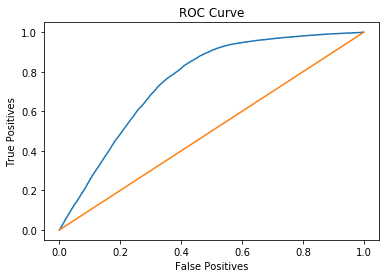

In [15]:
print('accuracy', Evaluation.get_metric(pred, y['valid'], 'accuracy', threshold))
print('precision', Evaluation.get_metric(pred, y['valid'], 'precision', threshold))
print('recall', Evaluation.get_metric(pred, y['valid'], 'recall', threshold))
print('f1', Evaluation.get_metric(pred, y['valid'], 'F1', threshold))
print('threshold', threshold)
print(Evaluation.get_confusion_matrix(pred, y['valid'], threshold=threshold).numpy())
Evaluation.plot_roc_curve(pred, y['valid'])